<a href="https://colab.research.google.com/github/NRTPRIME/EDA-Capstone-Project-1-/blob/main/EDA_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Airbnb Booking Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

The objective of this project is to conduct a comprehensive analysis of Airbnb bookings in New York City. By analyzing the data, we aim to gain insights into various aspects of the Airbnb market in the city, including pricing trends, popularity of neighborhoods, and key factors influencing booking success.

The project will involve the following steps:
*  The first step of this project involves obtaining a dataset that contains information about Airbnb bookings in New York City. The dataset should include details such as listing information, host details, pricing, availability, and customer reviews. Various sources, including publicly available data and the Airbnb website, will be explored to gather the necessary information.
*  After obtaining the dataset, the next step is to clean and prepare the collected data. This involves handling missing values, removing duplicates, and addressing inconsistencies. Data transformations and feature engineering will also be performed to ensure the dataset is suitable for analysis.
*  The project will then move on to exploratory data analysis to uncover patterns, relationships, and trends within the dataset. Factors such as neighborhood popularity, pricing variations, and customer preferences will be explored. Visualizations and statistical techniques will be employed to extract meaningful insights.
*  The pricing analysis will examine the factors influencing the pricing of Airbnb listings in New York City. Key determinants of pricing, such as property type, location, amenities, and availability, will be identified. Regression analysis or machine learning algorithms will be used to build a predictive model for estimating listing prices.
*  The neighborhood analysis will evaluate the popularity of different neighborhoods in New York City for Airbnb bookings. The number of listings, average prices, and customer reviews across various neighborhoods will be analyzed.









# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The problem is to analyze Airbnb bookings in New York City and address challenges related to pricing optimization, neighborhood popularity, customer satisfaction, and personalized recommendations. The aim is to provide actionable insights and recommendations to improve the Airbnb experience for hosts and guests, enhancing efficiency and effectiveness in the booking process.

#### **Define Your Business Objective?**

The business objective of the New York Airbnb Booking Analysis is to optimize pricing strategies for hosts, enhance the guest experience, improve customer satisfaction, and provide personalized recommendations. This analysis aims to maximize revenue for hosts, help guests find suitable accommodations, and provide valuable insights for Airbnb stakeholders.

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
abnb = pd.read_csv("/content/Airbnb NYC 2019.csv")

Mounted at /content/drive


### Dataset First View

In [ ]:
# Dataset First Look
abnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
abnb.shape

So we have 48895 rows and 16 columns in dataset.

### Dataset Information

In [ ]:
# Dataset Info
abnb.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicates
duplicate_count = abnb.duplicated()
duplicate_count

In [ ]:
# Dataset Duplicates Value Count
duplicate_count = abnb.duplicated().sum()
duplicate_count

We have zero duplicate values.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
abnb_null = abnb.isnull().sum()
abnb_null

In [ ]:
# Visualizing the missing values
abnb_null = abnb.isnull().sum()
plt.figure(figsize=(10, 4))
abnb_null.plot(kind='bar')
plt.xlabel('Variables')
plt.ylabel('Missing Values Count')
plt.title('Missing Values by Variables')
plt.show()

### What did you know about your dataset?

* There are total four columns with null values.
* 'name' column is having total 16 null values.
* 'host_name' is having 21 null values.
* 'last_review' and 'reviews_per_month' are having 10052 null values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
abnb.columns

In [ ]:
# Dataset Describe
abnb.describe()

### Variables Description

We can see our dataset has 48895 rows/indexes and 16 columns/variables. Lets try to understand about the variables we've got here.

* id : A unique id
* name : The name of listed properties/room_type on platform
* host_id : A unique id
* host_name : Name of the host
* neighbourhood_group : A location of area
* neighbourhood : Area falls under neighbourhood_group
* latitude : Latitude coordinate of listing
* longitude : Longitude coordinate of listing
* room_type : Type to categorize listing rooms
* price : Price of listing
* minimum_nights : Minimum nights to be paid for single visit
* number_of_reviews : Number of reviews given by visitors
* last_review : Content of last review given
* reviews_per_month : Checks of per month/reviews given per month
* calculated_host_listings_count : Total no. of listing registered under the host
* availability_365 : The number of days for which a host is available in a year.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
abnb.nunique()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# droping unnecessary columns
abnb.drop(['last_review'] , axis=1 ,inplace = True)

#We know that reviews_per_month column have many null values, we will replace it with '0'.
abnb.fillna({'reviews_per_month':0} , inplace = True)

#And name and host_name also have some empty indexes, replace it with 'Unknown' and 'no_name' resp.
abnb['name'].fillna('Unknown' ,  inplace = True)
abnb['host_name'].fillna('no_name' ,  inplace = True)

# again examining changes
abnb.isna().sum()

In [ ]:
abnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# Drop the  listings with 0 listing price because it is not possible
abnb_zero = abnb[(abnb['price'])==0].index
abnb.drop(abnb_zero, inplace=True)

# Drop the  listings with 0 listing availability
abnb_avail = abnb[(abnb['availability_365'])==0].index
abnb.drop(abnb_avail, inplace=True)

# again examining changes
abnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.135400e+04,3.135400e+04,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,26147.000000,31354.000000,31354.000000
mean,2.100493e+07,8.145071e+07,40.728406,-73.948753,162.091822,8.338426,31.849365,1.810063,10.335460,175.834439
std,1.148777e+07,8.673941e+07,0.056562,0.051400,254.444750,23.838961,51.638559,1.805657,40.705488,126.195374
min,2.539000e+03,2.571000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.010000,1.000000,1.000000
25%,1.167354e+07,8.619004e+06,40.688392,-73.983280,70.000000,2.000000,2.000000,0.450000,1.000000,55.000000
50%,2.255750e+07,4.108975e+07,40.723725,-73.954115,112.000000,3.000000,10.000000,1.230000,1.000000,168.000000
75%,3.119452e+07,1.452368e+08,40.763037,-73.930152,189.000000,5.000000,39.000000,2.680000,3.000000,305.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### What all manipulations have you done and insights you found?

* We have dropped unnecessary column such as last_review.
* We know that reviews_per_month column have many null values, we will replace it with '0' because reviews_per_month can be zero but not null.
* And name and host_name also have some empty indexes we replaced it with 'Unknown' and 'no_name' respectivaly.
* By experimenting we get to know that in columns "price" and "availability_365" shows zero cost and not available throughout year respectively. So we drop that rows because zero price is not justifiable and Hosts not available around the year is not possible.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<function matplotlib.pyplot.show(close=None, block=None)>

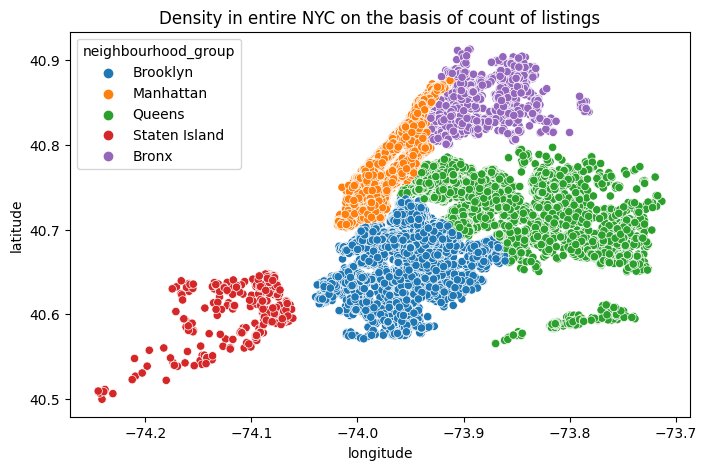

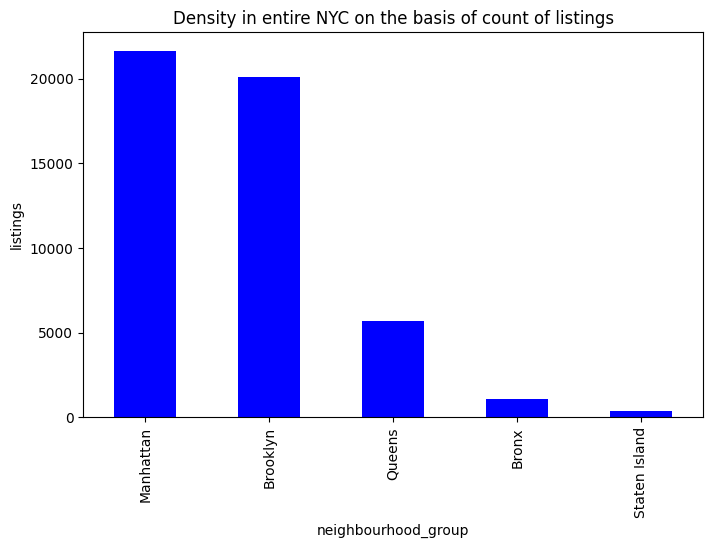

In [ ]:
# Chart - 1 visualization code

# Density of listing in entire NYC on the basis of count of listings
plt.figure(figsize=(8, 5))
plt.title('Density in entire NYC on the basis of count of listings')
sns.scatterplot(x='longitude', y='latitude', data=abnb, hue='neighbourhood_group',)

# Barplot of neighbourhood_group vs neighbourhood_group listing counts
plt.figure(figsize=(8, 5))
plt.title('Density in entire NYC on the basis of count of listings')
neighbourhood_group_counts = abnb['neighbourhood_group'].value_counts()[:]
neighbourhood_group_counts.plot(kind='bar',color='blue')
plt.xlabel('neighbourhood_group')
plt.ylabel('listings')
plt.show

##### 1. Why did you pick the specific chart?



*   Scatter plot shows the locations of the listings in new york.

*   Bar plot shows numbers of listing with respect to 'neighbourhood_group'.

*   Both charts give us the information about the density of listings in new york.



##### 2. What is/are the insight(s) found from the chart?

* Brooklyn and Manhattan are seems to be dense with hotels and apartments compare to others having more than 20,000 listings each.
* Brooklyn ,manhatten , queens and bronx are directly connected neighbourhood groups while staten island is not directly connected.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This chart shows locations nearer to the prime hotspots can garner more bookings hence we try hard to list more number of demanding room type and increase overall revenue by attracting customer.

#### Chart - 2

<function matplotlib.pyplot.show(close=None, block=None)>

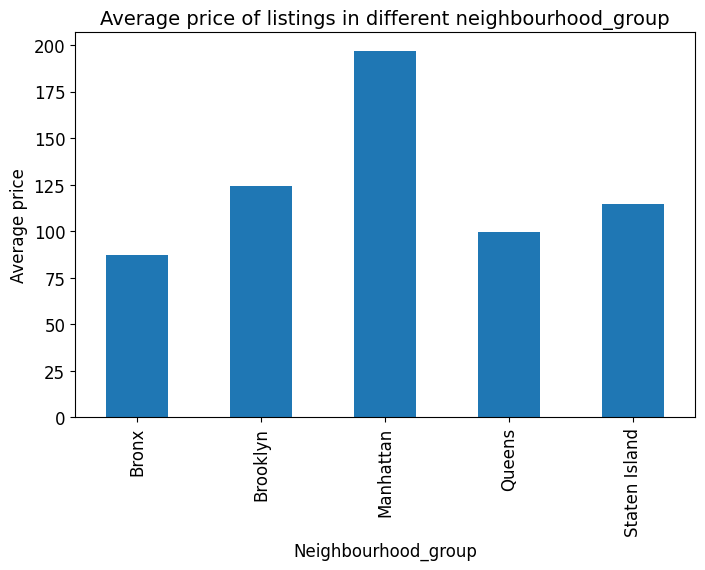

In [ ]:
# Chart - 2 visualization code
# 'Average price of listings in different neighbourhood_group'
a=abnb.groupby(['neighbourhood_group'])['price'].mean()
# plotting bar chart
chart2 = a.plot.bar(figsize=(8,5), fontsize=12)
# labeling bar chart
chart2.set_xlabel('Neighbourhood_group' , fontsize=12)
chart2.set_ylabel('Average price',  fontsize=12 )
chart2.set_title('Average price of listings in different neighbourhood_group',  fontsize=14 )
# # show bar chart
plt.show

##### 1. Why did you pick the specific chart?

To find out the Average price of listings in different neighbourhood_group of New York.

##### 2. What is/are the insight(s) found from the chart?



*   Manhattenn have the highest average price of listings nearly 200.
*   Others have the average price of listings in between 85 to 125.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Manhatten seems to have more average price of listings inspite of higher numbers of listings . This shows that manhatten is highly desired place to live in.

#### Chart - 3

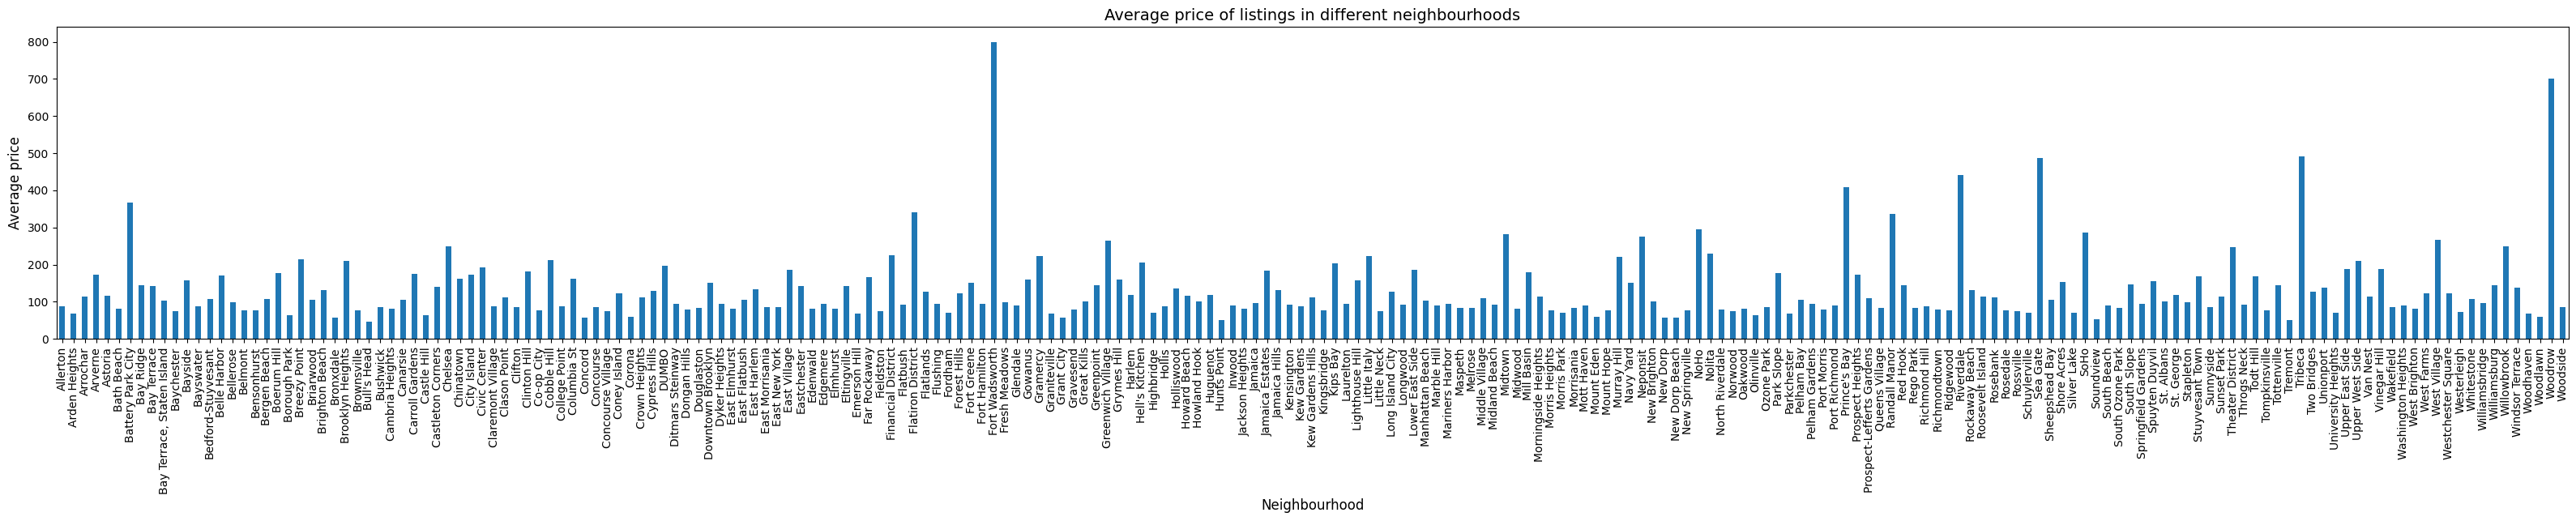

In [ ]:
# Chart - 3 visualization code
# 'Average price of listings in different neighbourhood
b = abnb.groupby(['neighbourhood'])['price'].mean()
# plotting bar chart
chart3 = b.plot.bar(figsize = (40,5) , fontsize=10,)
# labeling bar chart
chart3.set_xlabel('Neighbourhood' , fontsize=12)
chart3.set_ylabel('Average price',  fontsize=12 )
chart3.set_title('Average price of listings in different neighbourhoods',  fontsize=14 )
# # show bar chart
plt.show()

##### 1. Why did you pick the specific chart?

To find out the Average price of listings in different neighbourhoods of New York.

##### 2. What is/are the insight(s) found from the chart?



Above bar chart shows that most of the neighbourhoods have average price listing is below 200, very few have in between 200 to 500 and only two neighbourhoods have above 600.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Most of the listings have average price below 200 shows that customers prefers the affordable rooms.

#### Chart - 4

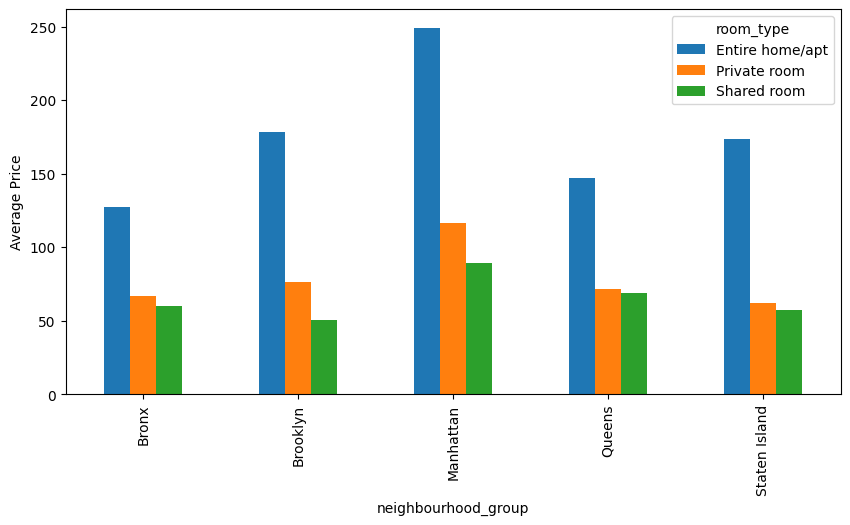

In [ ]:
# Chart - 4 visualization code
# average prefered price at every neighbourhood group as per type of room
avg_price = abnb.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
# plotting bar chart
avg_price.plot.bar(figsize=(10,5),  fontsize=10, ylabel = 'Average Price')
# # show bar chart
plt.show()

##### 1. Why did you pick the specific chart?


The provided bar plot illustrates the relationship between price and room type across various neighborhood groups. It allows us to compare the prices of different room types within each neighborhood group.

##### 2. What is/are the insight(s) found from the chart?

The chart clearly displays noticeable trends regarding the relationship between price, room type, and neighborhood groups. It reveals that, on average, Entire home/apartment listings have the highest prices, followed by Private room and Shared room listings. Additionally, the chart highlights that Manhattan stands out as the neighborhood group with the highest average prices compared to other neighborhood groups.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The chart provides valuable business insights into revenue realization, specifically regarding the room types and neighborhood groups that yield the highest monetary benefits, ultimately contributing to profit generation. By analyzing the chart, we can determine which combination of room types and neighborhood groups is most advantageous for maximizing profits. This information can guide decision-making and resource allocation strategies to optimize revenue and achieve the goal of maximizing profitability.

#### Chart - 5

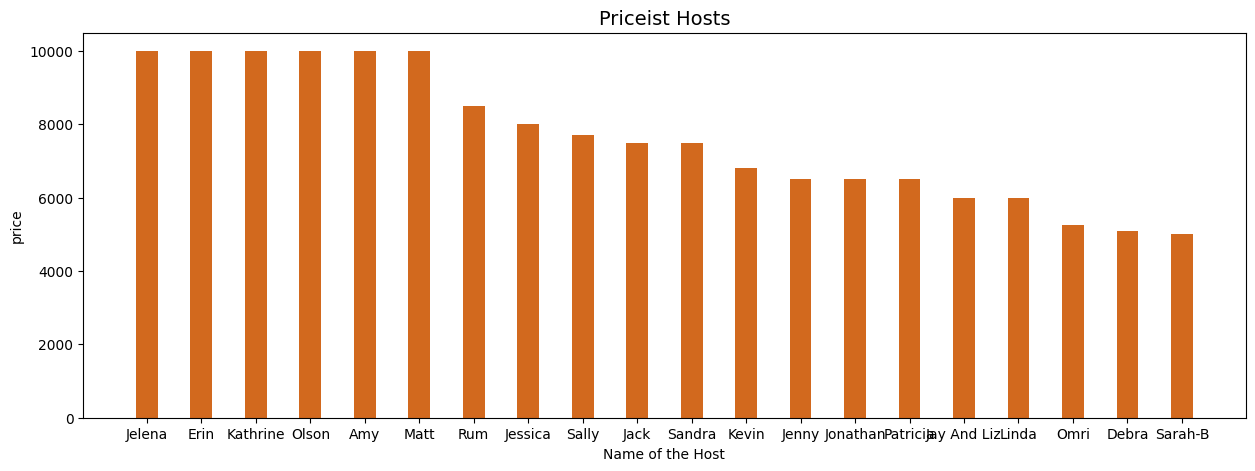

In [ ]:
# Chart - 5 visualization code
# Top 20 most priced listings
t20_priced = abnb.groupby(['host_name', 'host_id','room_type'])['price'].max().reset_index()
t20_priced = t20_priced.sort_values('price', ascending=False).head(20)
# plotting bar chart
name = t20_priced['host_name']
price = t20_priced['price']
fig = plt.figure(figsize = (15, 5))
plt.bar(name, price, color ='chocolate', width = 0.4)
# labeling bar chart
plt.xlabel("Name of the Host")
plt.ylabel("price")
plt.title("Priceist Hosts", fontsize=14)
# show bar chart
plt.show()

##### 1. Why did you pick the specific chart?


I picked a horizontal bar chart for displaying the top 20 most priced listings because it allows for clear visualization of the listing IDs and their corresponding prices.

##### 2. What is/are the insight(s) found from the chart?

The chart showcases the highest-priced listings in the dataset, allowing us to identify luxury accommodations and unique features that cater to high-end travelers.It highlights the upper range of prices in the market (which is as high as 10,000), giving an understanding of the premium rates guests are willing to pay for accommodations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*  Catering to High-End Market: By understanding the presence of a luxury and high-end market segment, businesses can tailor their offerings to attract affluent travelers and provide premium accommodations. This can lead to higher revenue and profitability.

*  Premium Pricing Opportunities: Recognizing the willingness of guests to pay a significant amount for unique and exclusive experiences allows businesses to set premium prices for their high-value listings. This can result in increased revenue and higher profit margins.

Negative Insight -
*  The luxury market segment may have a smaller customer base compared to the overall market. Businesses targeting this segment should carefully assess the size and demand of the market to ensure sufficient customer demand for their high-priced offerings.

#### Chart - 6

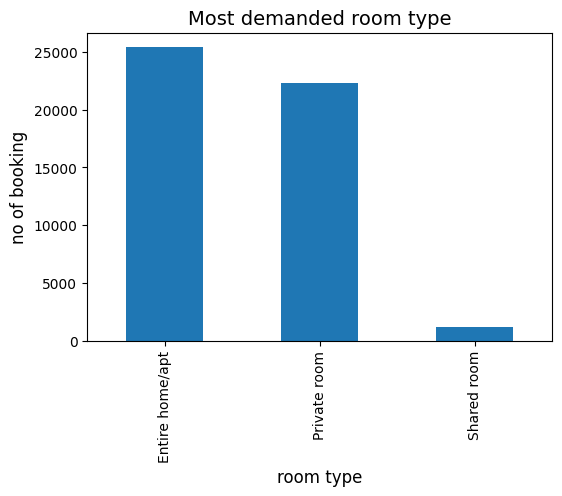

In [ ]:
# Chart - 6 visualization code
# finding out most demanded room type
most_damanded_room = abnb.groupby(['room_type'])["host_id"].count()
# plotting bar chart
b = most_damanded_room.plot.bar(figsize = (6,4), fontsize = 10)
# labeling bar chart
b.set_xlabel("room type", fontsize = 12)
b.set_ylabel("no of booking", fontsize = 12)
b.set_title("Most demanded room type", fontsize=14)
# show bar chart
plt.show()

##### 1. Why did you pick the specific chart?

This chart shows that which room type is in most demand.

##### 2. What is/are the insight(s) found from the chart?

Based on the chart, it is evident that the least in-demand room type is a shared room, whereas the most sought-after room type is an entire house/apartment. It is clear that people prefer to rent an entire house/apartment over a shared room, indicating a significant demand for this particular accommodation option

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Based on the data, we have learned that the majority of people prefer to rent entire houses/apartments rather than shared rooms. With this valuable insight, we can focus on maximizing the availability and listing of rental properties that offer entire houses/apartments or private rooms. By aligning our offerings with the demand, we aim to meet the expectations and preferences of potential renters and provide them with the desired accommodation options.


#### Chart - 7

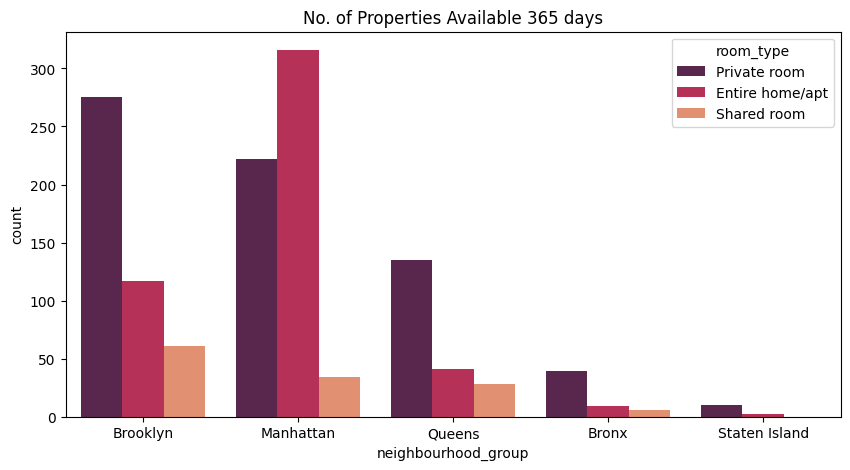

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize = (10,5))
# Number of properties available for how many days in year
sns.countplot(data=abnb[abnb['availability_365']  == 365], x='neighbourhood_group', hue='room_type', palette='rocket')
# labeling a chart
plt.title('No. of Properties Available 365 days', fontsize=12)
# show chart
plt.show()

##### 1. Why did you pick the specific chart?

Above chart will give us idea about availability of room_type in respective neighbourhood group.

##### 2. What is/are the insight(s) found from the chart?

Based on the subplot, we can observe a clear trend regarding the availability of different room types throughout the year. Generally, private rooms are the most commonly available option, consistently so throughout the year, except in the case of Manhattan. Conversely, shared rooms tend to have the least availability regardless of the neighborhood group. This data provides us with valuable insights into the fluctuating availability of room types and highlights the prominence of private rooms as the most frequently offered option, except in Manhattan.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By analyzing the data, we can identify the neighborhood groups where certain room types are in high demand and ensure their listings are readily available. Additionally, we can identify the neighborhood groups where specific room types have the least demand and consider delisting or adjusting their availability accordingly.This data-driven approach allows us to optimize our rental property listings, ensuring that the most sought-after room types are readily available while minimizing the availability of less popular room types.

Negative Insight - In Manhattan, we have observed that the Entire home/apt accommodation option has the highest availability throughout the year. However, in the earlier charts, we also noticed that the same room_type receives the most bookings but also has the highest vacancy rate, which could be attributed to the abundance of listings for the same room_type in the area.


#### Chart - 8

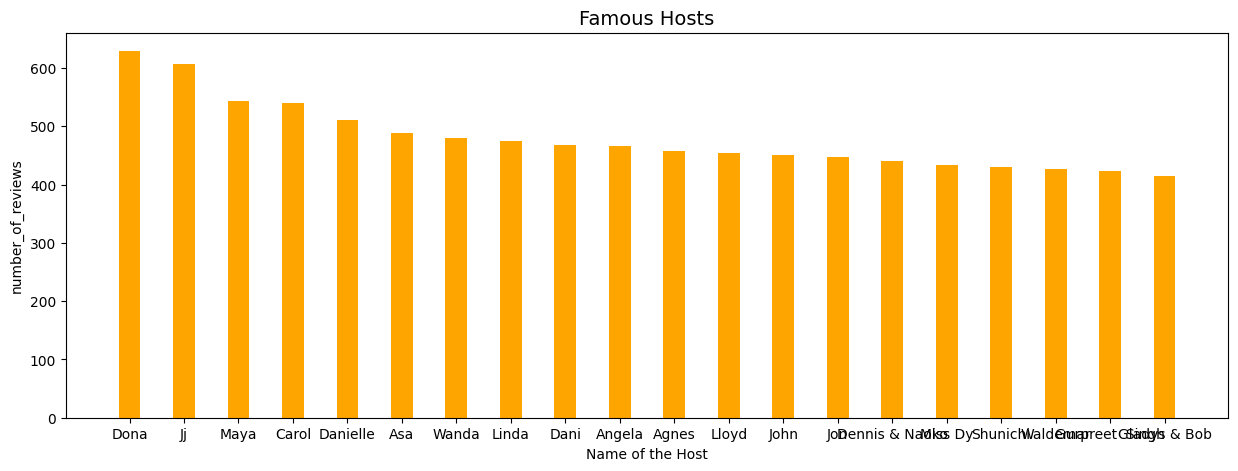

In [ ]:
# Chart - 8 visualization code
# Top 20 most priced listings
t20_priced = abnb.groupby(['host_name', 'host_id','room_type'])['number_of_reviews'].max().reset_index()
t20_priced = t20_priced.sort_values('number_of_reviews', ascending=False).head(20)
# plotting bar chart
name = t20_priced['host_name']
price = t20_priced['number_of_reviews']
fig = plt.figure(figsize = (15, 5))
plt.bar(name, price, color ='orange', width = 0.4)
# labeling bar chart
plt.xlabel("Name of the Host")
plt.ylabel("number_of_reviews")
plt.title("Famous Hosts according to number_of_reviews", fontsize=14)
# show bar chart
plt.show()

##### 1. Why did you pick the specific chart?

I chose a horizontal bar chart for displaying the top 20 busiest hosts based on the number of reviews because it effectively presents the comparison of review counts among hosts.

##### 2. What is/are the insight(s) found from the chart?

The chart identifies the hosts with the highest number of reviews, indicating their popularity among guests.Certain hosts consistently attract guests and maintain a high level of booking activity over time.
Review counts reflect guest feedback and overall satisfaction with the host's accommodations and hospitality.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Guest feedback in the form of reviews helps businesses understand areas for improvement. By analyzing common themes and addressing any shortcomings, businesses can enhance the overall guest experience and generate positive reviews.It's important to note that the positive impact depends on how businesses act upon the insights gained and their ability to implement effective strategies based on those insights. Regular monitoring, continuous improvement, and a focus on delivering exceptional guest experiences are crucial for translating insights into positive business outcomes.

#### Chart - 9

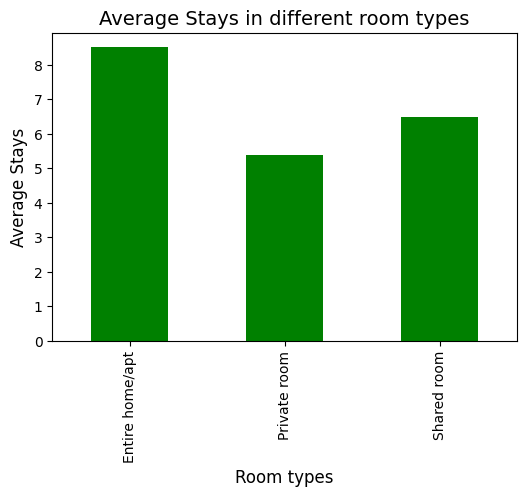

In [ ]:
# Chart - 9 visualization code
# 'Average Stays in different room types & plotting chart'
abnb.groupby('room_type')['minimum_nights'].mean().plot(figsize= (6,4), kind='bar', color='green')
# labeling bar chart
plt.title('Average Stays in different room types', fontsize = 14)
plt.xlabel('Room types', fontsize = 12)
plt.ylabel('Average Stays', fontsize = 12 )
# show bar chart
plt.show()

##### 1. Why did you pick the specific chart?

I selected this specific chart to illustrate the average duration of stays across different room types.

##### 2. What is/are the insight(s) found from the chart?

This chart provides valuable insights regarding the average length of stays for different room types. It helps businesses understand the duration for which facilities need to be adequately provided and when each room type becomes available again for booking.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This chart enables us to calculate the potential business profit by determining the number of times each room type can be made available for booking within a month. Using this information, we can make informed decisions about the booking prices, taking into account the expenses associated with providing the necessary facilities.

#### Chart - 10

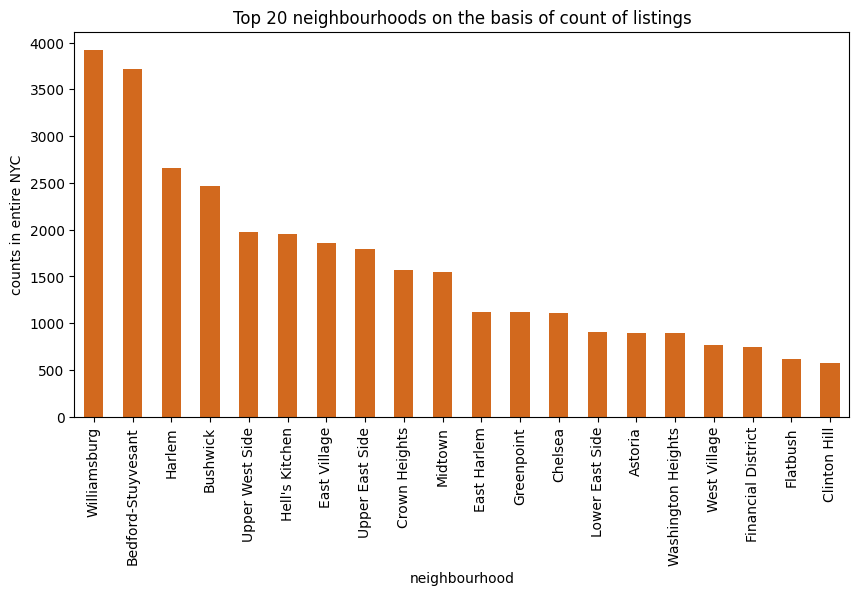

In [ ]:
# Chart - 10 visualization code
#checking top 20 neighbourhoods on the basis of no of listings in entire NYC!
top_20_neigbours = abnb['neighbourhood'].value_counts()[:20]
# 'plotting bar chart'
top_20_neigbours.plot(kind='bar',color='chocolate', figsize= (10,5))
# labeling bar chart
plt.xlabel('neighbourhood')
plt.ylabel('counts in entire NYC')
plt.title('Top 20 neighbourhoods on the basis of count of listings')
# show bar chart
plt.show()

##### 1. Why did you pick the specific chart?

This graph indicates the area with the highest number of bookings.

##### 2. What is/are the insight(s) found from the chart?

Williamsburg ,Bedford-Stuyvesant and Harlem are the top 3 neighbourhoods that have the highest number of reservations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


By utilizing this data, we can identify specific areas where service improvements are needed, allowing us to enhance our offerings. Additionally, we can strategically narrow down our advertising efforts to specific market regions, effectively reducing costs while maximizing profitability.

#### Chart - 11

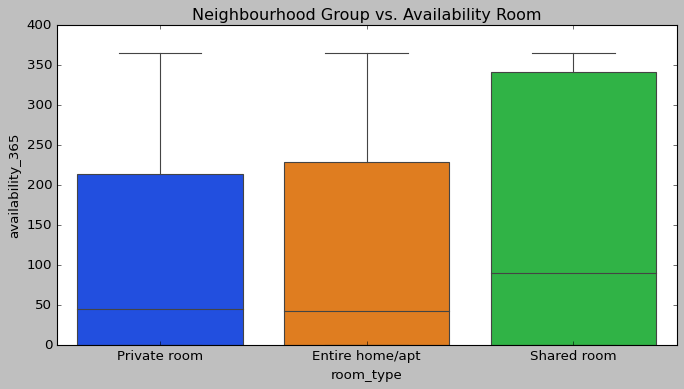

In [ ]:
# Chart - 11 visualization code
# plotting & labeling box plot of Neighbourhood Group vs. Availability Room
plt.style.use('classic')
plt.figure(figsize=(10,5))
plt.title("Neighbourhood Group vs. Availability Room")
sns.boxplot(data=abnb , x = 'room_type' , y = 'availability_365', palette = "bright")
# show bar chart
plt.show()

##### 1. Why did you pick the specific chart?

By using this box plot, we can effectively compare the availability distribution and identify any differences or similarities across Neighbourhood Groups. It provides a concise summary of the data and enables easy identification of patterns and outliers.

##### 2. What is/are the insight(s) found from the chart?

The position of the median line within each box indicates the central tendency of availability. A higher median value suggests a higher average availability, while a lower median value indicates a lower average availability.Median values of private room ,entire home/apt are below 50 while shared rooms is near to 100.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By understanding the availability patterns across different Neighbourhood Groups, businesses can optimize their operations. They can allocate resources more effectively, adjust pricing strategies, and tailor marketing efforts to capitalize on areas with higher availability.

#### Chart - 12

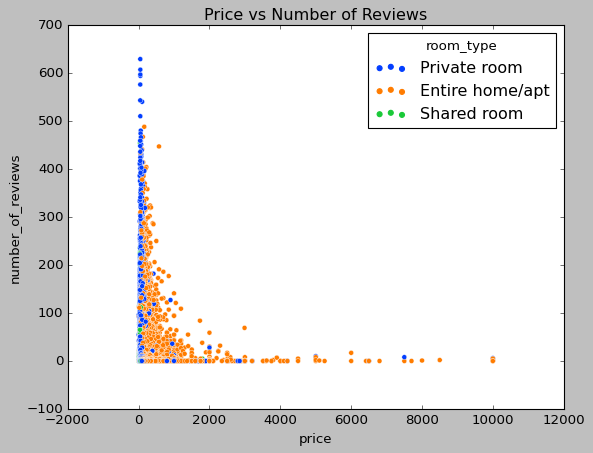

In [22]:
# Chart - 12 visualization code
# plotting & labeling scatterplot of Price vs Number of Reviews
sns.scatterplot(data=abnb, x='price', y='number_of_reviews', hue='room_type', palette = "bright")
plt.title('Price vs Number of Reviews')
# show bar chart
plt .show()

##### 1. Why did you pick the specific chart?

I tried to draw relationshiop between price and number of reviews.

##### 2. What is/are the insight(s) found from the chart?

The data suggests an inverse correlation between room prices and the quantity of reviews. It is observed that lower-priced accommodations tend to attract more guests, resulting in a higher likelihood of receiving reviews.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The chart depicts the relationship between price and reviews, revealing the booking volume for a reasonable price range that generates revenue. It indicates that there is a specific price point range where the number of reviews is high, suggesting a higher booking volume and potential revenue generation.

#### Chart - 13

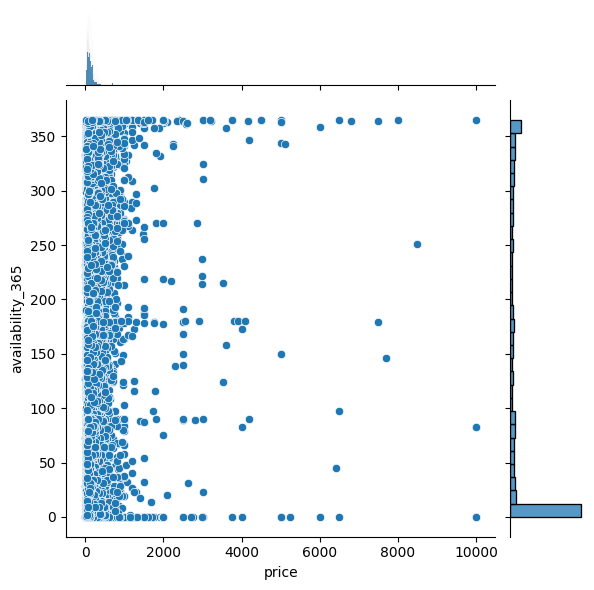

In [ ]:
# Chart - 13 visualization code
# plotting & labeling jointplot of availability_365 vs Price
sns.jointplot(x = 'price', y ='availability_365', data = abnb)
# show bar chart
plt.show()

##### 1. Why did you pick the specific chart?

Jointplot is a useful chart for understanding the relationship between availability_365 and price in the Airbnb booking analysis. It provides both a visual representation of the data and quantitative measures of correlation, enabling us to derive insights and make data-driven decisions.

##### 2. What is/are the insight(s) found from the chart?

the scatter plot shows a negative correlation, it suggests that as prices increase, availability decreases, and vice versa.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By understanding the relationship between availability and price, businesses can optimize their pricing strategy. They can identify price ranges that correspond to higher availability and adjust their pricing accordingly. This can lead to increased booking volume, revenue, and profitability.

#### Chart - 14 - Correlation Heatmap

<ipython-input-28-0b850451fe9f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = abnb.corr(method = 'kendall')


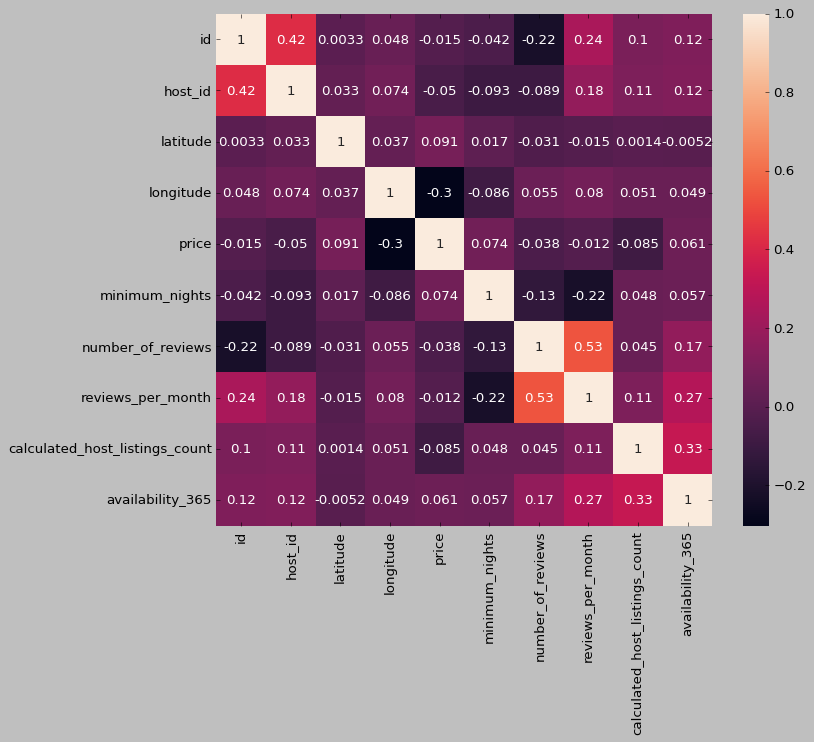

In [28]:
# Correlation Heatmap visualization code
# plotting & labeling heatmap of Airbnb Booking
corr = abnb.corr(method = 'kendall')
plt.figure(figsize= (10,8))
sns.heatmap(corr, annot =True)
abnb.columns
# show bar chart
plt.show()

##### 1. Why did you pick the specific chart?


The Correlation Heatmap shows us visual bi-variate correlation and relationship between numerical columns of Dataframe in the form of colour shades. We get quick visualisation of large amount of data.

##### 2. What is/are the insight(s) found from the chart?

The Heatmap Matrix shows that certain variables are positively correlated with each other, while others are negatively correlated. For example, there is a positive correlation between the number of reviews and the reviews per month, as well as between the calculated host listings count and the availability for 365 days. On the other hand, there is a negative correlation between the price and longitude, the number of reviews and the ID, and the reviews per month and the minimum nights.

#### Chart - 15 - Pair Plot

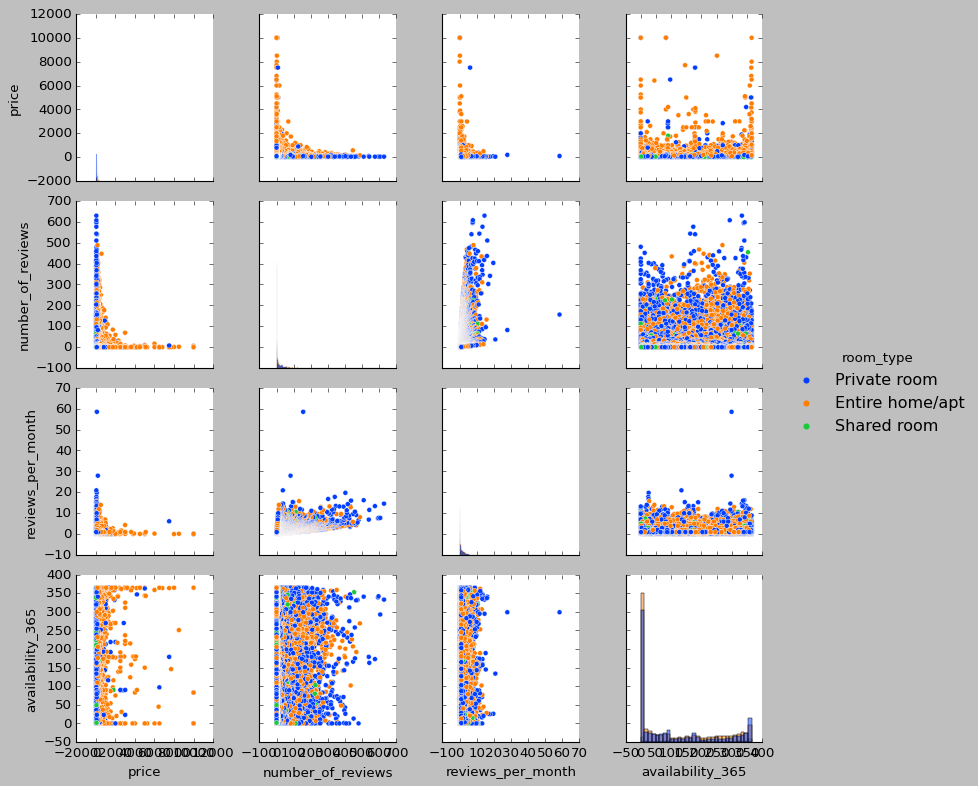

In [31]:
# Pair Plot visualization code
#Pair Plot visualization of outlier cleaned data
sns.pairplot(abnb, hue='room_type',
             x_vars=['price', 'number_of_reviews','reviews_per_month','availability_365'],
             y_vars=['price', 'number_of_reviews','reviews_per_month','availability_365'],
             kind='scatter', diag_kind= 'hist', palette = 'bright')
# show bar chart
plt.show()

##### 1. Why did you pick the specific chart?


The pair plot is an ideal visualization for examining the correlation between any two chosen numerical variables in a given dataset. It provides a comprehensive view of multiple charts within a single grid, resembling a dashboard.

##### 2. What is/are the insight(s) found from the chart?

The connection between two variables and the creation of distinct clusters reveals interesting information. For example, there is a negative relationship between price and the number of reviews, meaning that as the price increases, the number of reviews per month decreases. When comparing reviews per month to availability_365, it is observed that properties with less than 20 reviews per month tend to have higher availability throughout the year. Furthermore, there is a cluster of entire home/apt properties available for higher prices when examining the relationship between availability_365 and price.

The histogram provides a visual representation of each variable's frequency, distribution, and density. It also highlights the characteristics of skewness within the data.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

*   Optimize Pricing Strategy: Use the insights gained from analyzing the price and reviews correlation to set competitive and attractive pricing for different room types. Adjust prices based on the demand and occupancy patterns to maximize revenue.

*   Enhance Customer Satisfaction: Analyze the busiest hosts and their room types to identify the facilities and amenities that attract the most customers. Use this information to improve and tailor the offerings to meet customer preferences, resulting in higher satisfaction and positive reviews.

*   Maximize Occupancy and Availability: Use the insights from the availability and calculated_host_listings_count correlation to manage and distribute availability effectively across multiple listings. Ensure a consistent and optimal level of availability to attract more bookings and maximize occupancy rates.

*   Identify Profitable Booking Periods: Utilize the insights from the correlation between availability and price to identify periods with higher availability and adjust pricing accordingly. This can help maximize revenue during peak booking periods and optimize pricing during low-demand periods.

*   Improve Marketing and Targeting: Analyze the correlation between room type, neighborhood group, and availability to identify the most in-demand combinations. Tailor marketing efforts to target specific customer segments interested in those room types and locations.

*   Evaluate Competitor Strategies: Monitor the correlation between reviews and price, as well as the busiest hosts, to gain insights into competitor pricing strategies and service offerings. Identify areas where your business can differentiate itself and offer unique value to attract more customers.

Overall, the gained insights from the Airbnb booking analysis can be leveraged to make informed decisions and implement strategies that optimize pricing, enhance customer satisfaction, maximize occupancy, and improve overall business performance. It is crucial to align these insights with your specific business objectives and adapt them to your unique circumstances to achieve positive business impact.

# **Conclusion**

*   We have find out the Top 20 neighbourhoods where
number of booking is high, we can focus on those areas for marketting campaigns and advertisements for maximize booking and reduce marketting cost by redcing the focus areas.
*   The majority of guests have a preference for booking entire homes/apartments or private rooms rather than shared accommodations. The most sought-after neighborhood groups in New York City are Manhattan and Brooklyn.
*   Manhattan and Brooklyn are regarded as upscale and exclusive neighborhoods in New York City. While the location of a property greatly influences its price, it is important to note that a property in a sought-after location does not guarantee constant occupancy.
*  Manhattenn have the highest average price of listings nearly 200.Others have the average price of listings in between 85 to 125.
* The chart clearly displays noticeable trends regarding the relationship between price, room type, and neighborhood groups. It reveals that, on average, Entire home/apartment listings have the highest prices, followed by Private room and Shared room listings. Additionally, the chart highlights that Manhattan stands out as the neighborhood group with the highest average prices compared to other neighborhood groups.
* The chart showcases the highest-priced listings in the dataset, allowing us to identify luxury accommodations and unique features that cater to high-end travelers.It highlights the upper range of prices in the market (which is as high as 10,000), giving an understanding of the premium rates guests are willing to pay for accommodations.Jelena,Kathrine,Erin,Matt,Olson,Amy are the most priceist host with maximum price of 10,000.
*  Most of the guests doesn't prefer shared rooms rather choose entire home/apt and private room. Manhattan and Brooklyn are most demanded neighbourhood groups.
*  Number of properties available in year for maximum days is higher in New York City are Manhattan and Brooklyn.
*  Certain hosts consistently attract guests and maintain a high level of booking activity over time. Review counts reflect guest feedback and overall satisfaction with the host's accommodations and hospitality.Donna,Ji,Carol,Maya & Danielle are the top five famous host based on reviews.
* The average stays in Entire home/apt, Shared room and Private room are 8, 6 and 5 days approx. resp. Get to know the average number of booking for respective room type in a month.
*  Most of the listings in NYC is nearly 1000 per neighbourhood but williamsberg and bedford-stuyvesant have nearly 4000 which are highest
* The position of the median line within each box indicates the central tendency of availability. A higher median value suggests a higher average availability, while a lower median value indicates a lower average availability.Median values of private room ,entire home/apt are below 50 while shared rooms is near to 100.
*  Based on the data, it seems that there is a relationship between the price of a room and the number of reviews it receives. It has been noticed that cheaper accommodations tend to have more guests and therefore have a higher chance of getting reviews.
* Lower priced listings appears to have almost all year availability.Most subscribed booking price is come within the bracket of $10-2000 where almost 95% booking happens as well as most reviews are also given by these guests. One more thing Private room and Entire home/apt gives most number of reviews.
*  Many of the leading hosts primarily focus on Manhattan and Brooklyn when it comes to their listings. This is because these areas have higher prices and receive the most booking.
The results of an in-depth analysis of Airbnb data offer valuable insights for both hosts and guests, enabling them to make smarter choices. Hosts can gain a better understanding of the amenities that guests value and how to set competitive prices for their properties. Meanwhile, guests can use specific criteria to make well-informed decisions about the location, amenities, and pricing of the properties they wish to book.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***